<a href="https://colab.research.google.com/github/eujamesbruno/SniperCriativos/blob/main/SniperCriativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados com métricas calculadas:
   Ad_ID  Impressions  Clicks  Conversions  Cost       CTR       CPC   CPA
0   AD1        10000     150           10   100  0.015000  0.666667  10.0
1   AD2        15000     200           20   150  0.013333  0.750000   7.5
2   AD3        20000     500           50   200  0.025000  0.400000   4.0
3   AD4        30000     600           60   300  0.020000  0.500000   5.0
4   AD5        12000     180           15   120  0.015000  0.666667   8.0

Dados com pontuações calculadas:
   Ad_ID  Impressions  Clicks  Conversions  Cost       CTR       CPC       CPA  \
0   AD1        10000     150           10   100  0.142857  0.761905  1.000000   
1   AD2        15000     200           20   150  0.000000  1.000000  0.583333   
2   AD3        20000     500           50   200  1.000000  0.000000  0.000000   
3   AD4        30000     600           60   300  0.571429  0.285714  0.166667   
4   AD5        12000     180           15   120  0.142857  0.761905  0.666667   

  

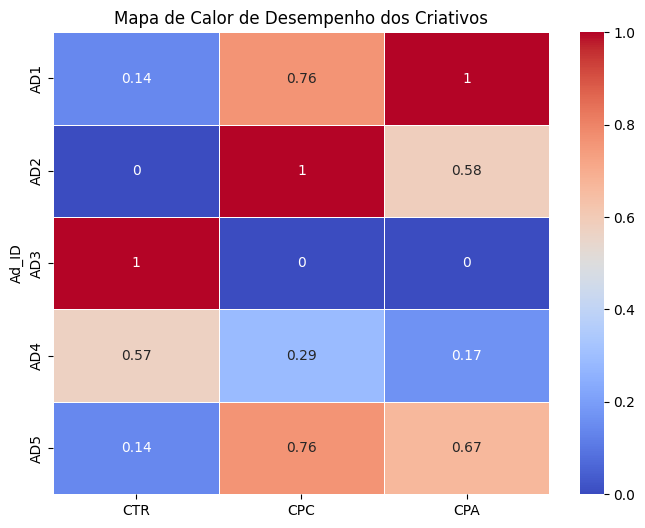


Melhores criativos com base na pontuação:
   Ad_ID     Score
2   AD3  1.000000
3   AD4  0.692857
4   AD5  0.228571


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Exemplo de dados de criativos (simulados)
data = {
    'Ad_ID': ['AD1', 'AD2', 'AD3', 'AD4', 'AD5'],
    'Impressions': [10000, 15000, 20000, 30000, 12000],
    'Clicks': [150, 200, 500, 600, 180],
    'Conversions': [10, 20, 50, 60, 15],
    'Cost': [100, 150, 200, 300, 120]
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Calcular métricas
df['CTR'] = df['Clicks'] / df['Impressions']  # Taxa de cliques (Click-Through Rate)
df['CPC'] = df['Cost'] / df['Clicks']  # Custo por clique (Cost per Click)
df['CPA'] = df['Cost'] / df['Conversions']  # Custo por aquisição (Cost per Acquisition)

# Exibir o DataFrame com as novas métricas
print("Dados com métricas calculadas:\n", df)

# Normalizar as métricas para garantir uma escala uniforme
metrics = ['CTR', 'CPC', 'CPA']

scaler = MinMaxScaler()
df[metrics] = scaler.fit_transform(df[metrics])

# Criar uma pontuação para cada criativo com base nas métricas normalizadas
# Fórmula de pontuação ponderada (exemplo: maximizar CTR e minimizar CPC e CPA)
df['Score'] = df['CTR'] * 0.4 + (1 - df['CPC']) * 0.3 + (1 - df['CPA']) * 0.3

# Exibir o DataFrame com as pontuações
print("\nDados com pontuações calculadas:\n", df)

# Gerar um mapa de calor para visualização do desempenho das métricas
heatmap_data = df.set_index('Ad_ID')[['CTR', 'CPC', 'CPA']]  # Configurar os dados para o mapa de calor

# Criar o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Desempenho dos Criativos')
plt.show()

# Selecionar os melhores criativos com base na pontuação
top_creatives = df[['Ad_ID', 'Score']].sort_values(by='Score', ascending=False).head(3)
print("\nMelhores criativos com base na pontuação:\n", top_creatives)